<a href="https://colab.research.google.com/github/Shubhbetter/Machine_Learning_Traning/blob/main/Machine_Learning_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
#plt.style.use('dark_background')

In [3]:
data = pd.read_csv('/content/Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


# Task:
1. To create a mean regression model based on "No of Floors" column and call it "floor_mean"
2. To compare the residual plots of overall "mean_sales" and "floor_mean".
3. To calculate the R-Square value for "floor_mean" model manually without using sklearn.

## 1. To create "floor_mean" column

In [4]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [5]:
## To check the unique values in column "No of Floors"

###### Start code ######
data['No of Floors'].unique()
###### End code ######

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

### Expected Output


```
array([1. , 2. , 1.5, 3. , 2.5, 3.5])
```


In [6]:
## Using pandas.pivot_table() to calculate the "floor_mean"

### Start code ###
floor_mean = pd.pivot_table(data, values = 'Sale_Price', columns = 'No of Floors', aggfunc = np.mean)
### End code ###
floor_mean

No of Floors,1.0,1.5,2.0,2.5,3.0,3.5
Sale_Price,431826.297032,542188.988482,599260.70846,798774.47205,551141.645425,662634.375


### Expected Output
<img src="images/image1.png">

In [10]:
# making new column
data['floor_mean'] = 0

# for every unique floor_mean, fill its mean price in new column "floor_mean"
for i in floor_mean.columns:
  ### start code ###
  data.loc[data['No of Floors'] == i, 'floor_mean'] = floor_mean[i][0]
  ### end code ###

data['floor_mean'].head()

0    431826.297032
1    599260.708460
2    431826.297032
3    431826.297032
4    431826.297032
Name: floor_mean, dtype: float64

## 2. To Compare Residual plots

### Expected Output
<img src="images/image2.png">

In [11]:
## Calculating residuals floor_mean_difference and mean_difference
### start code###
mean_difference = data['Sale_Price'] - data['mean_sales']
floor_mean_difference = data['Sale_Price'] - data['floor_mean']
### end code ###
mean_difference.size, floor_mean_difference.size

(21609, 21609)

### Expected Outcome
<img src="images/image3.png">

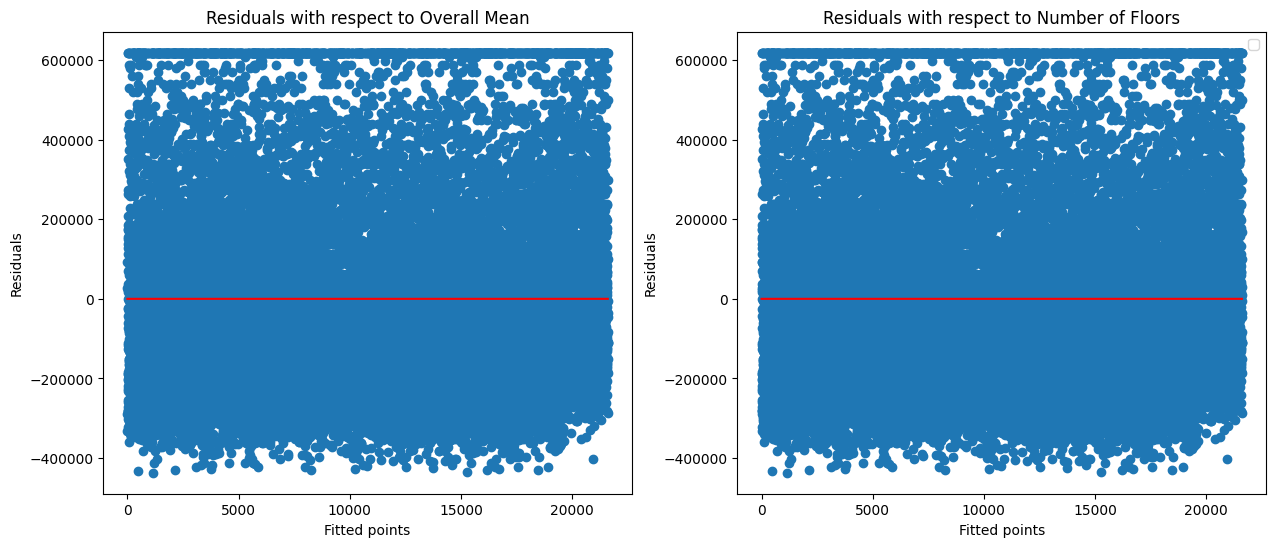

In [14]:
## Plotting the Residuals for comparison

k = range(0, len(data)) # for x axis
l = [0 for i in range(len(data))] # for regression line in residual plot

plt.figure( figsize = (15,6), dpi =100)

################## plot for Overall Mean ####################
plt.subplot(1,2,1)
#code to create the residual of mean regression model along with regression line
### start code ###
plt.scatter(k, mean_difference)
plt.plot(k, l, color = 'red')
### end code ###
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')


################## plot for Overall Mean ####################
plt.subplot(1,2,2)
#code to create the residual of floor mean regression model along with regression line
### start code ###
plt.scatter(k, mean_difference)
plt.plot(k, l, color = 'red')
### end code ###
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title("Residuals with respect to Number of Floors")

plt.legend()

### Expected Outcome
<img src="images/image4.png">

## 3. To calculate $R^2$ value of the "floor_mean" model manually
<img src="images/image5.png">

In [23]:
## Calculate mean square error for overall mean regression model and call it MSE 1
### start code ###
y = data['Sale_Price'] # Extract the target variable from the DataFrame
MSE1 = np.mean((y - y.mean())**2)
### end code ###
## Calculate mean square error for floor mean regression model and call it MSE 2
### start code ###
floor_mean_predictions = np.zeros(len(y))  # Placeholder for the actual predictions
MSE2 = np.mean((y - floor_mean_predictions)**2)
### end code ###
## calculate R-Square value using the formula and call it R2
### start code ###
R2 = 1- (MSE2 / MSE1)
### end code ###
R2

-4.186173552573518

### Expected Outcome
<img src="images/image6.png">